In [42]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
import keras
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [43]:
#load data
(xtrain, ytrain), (xtest,  ytest) = tf.keras.datasets.mnist.load_data()

In [44]:
xtrain.shape

(60000, 28, 28)

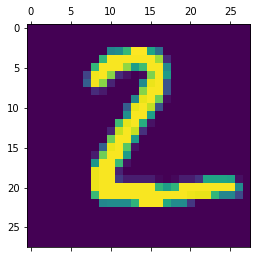

In [45]:
plt.matshow(xtest[1])

In [46]:
#normalization
xtrain = xtrain/255
xtest = xtest/255

In [47]:
xtest[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [48]:
#flatten the image into 28*28 to 784
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1,784)

In [49]:
xtrain[1].shape

(784,)

In [50]:
#build model
#sequencial
# 3 layers 1st two layers 64 neuron and relu function
# output layer 10 neuron softmax function
model = keras.Sequential()
model.add(Dense(64,activation='relu',input_dim=784)) # input layer
model.add(Dense(64,activation='relu',input_dim=784)) # hidden layer
model.add(Dense(10,activation='softmax')) # output layer

In [51]:
#model compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

In [52]:
#train model
model.fit(
    xtrain,
    to_categorical(ytrain),
    epochs = 10,
    batch_size=32
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5084 - accuracy: 0.8542
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1234 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0663 - accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0578 - accuracy: 0.9816
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0459 - accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0387 - accuracy: 0.9871
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0315 - accuracy: 0.9897
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9907
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.024

In [53]:
#evaluate the model
model.evaluate(
    xtest,
    to_categorical(ytest)
)

313/313 [==============================] - 1s 1ms/step - loss: 0.1017 - accuracy: 0.9748


[0.10174798220396042, 0.9747999906539917]

In [54]:
#predict 
pred = model.predict(xtest)
pred

array([[5.7316409e-12, 6.8334964e-12, 8.1979410e-09, ..., 1.0000000e+00,
        5.5829252e-12, 7.7716091e-09],
       [1.8808358e-10, 2.7663680e-09, 9.9999988e-01, ..., 7.1112456e-15,
        1.6167353e-07, 1.2123748e-15],
       [1.1743714e-09, 9.9992132e-01, 2.1043106e-05, ..., 5.4006974e-05,
        2.6584760e-06, 2.8378647e-08],
       ...,
       [5.4006104e-22, 2.0698298e-15, 3.1194801e-19, ..., 2.9110153e-08,
        8.4921349e-12, 1.9346444e-07],
       [4.2664359e-15, 3.7803808e-18, 4.4461094e-18, ..., 2.1549609e-15,
        1.6587268e-07, 1.0996139e-15],
       [7.3000095e-10, 7.5419450e-17, 4.4238545e-14, ..., 1.0306449e-17,
        2.6725444e-10, 3.3133554e-12]], dtype=float32)

In [57]:
np.argmax(pred[1])

2

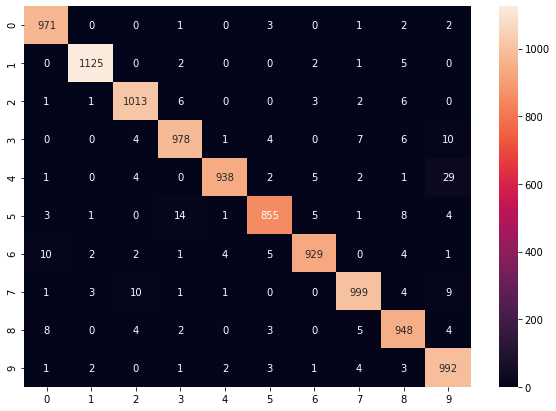

In [60]:
#confusion matrix
y_pred = model.predict(xtest)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,7))
sns.heatmap(con_matrix,annot=True,fmt='0')
plt.xlabel=('Prediction output')
plt.ylabel = ('Truth values')